In [1]:
#!/bin/python
import os
import sys
sys.path.append('/home/kal/TF_models/bin/')
import matplotlib.pyplot as plt

import ctcfgen
import sequence
import eval_TFmodel
import train_TFmodel
import numpy as np
import viz_sequence
import seq_only_gen
import helper


# get the generator
gen = seq_only_gen.TFGenerator('/home/kal/TF_models/seq_only/ctcfgen.hdf5')
g = gen.pos_gen()

Using TensorFlow backend.
/home/kal/TF_models/bin/sequence.py:275: RuntimeWarning: divide by zero encountered in log
  self.seq = helper.softmax(np.log(dist))


In [2]:
seq = sequence.Sequence(next(g)[0])
sigmodel = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_classifier/20170919_sigmoid_model/')
pwm = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_classifier/pwm_frozen/')
regmodel = reg = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_regression/20180125_174348_CTCF/')
regmodel.model.predict(train_TFmodel.blank_batch(seq.seq))[0][0]

Loading model without Bias layer


616.2998

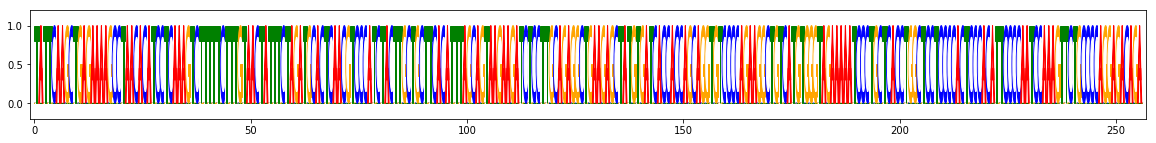

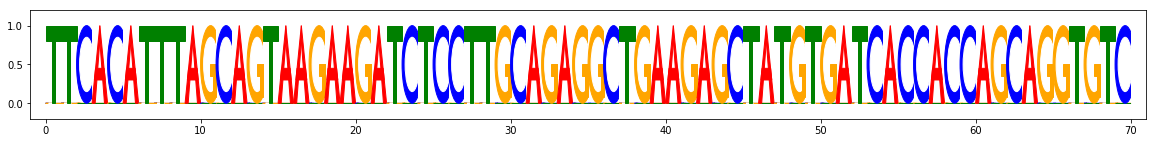

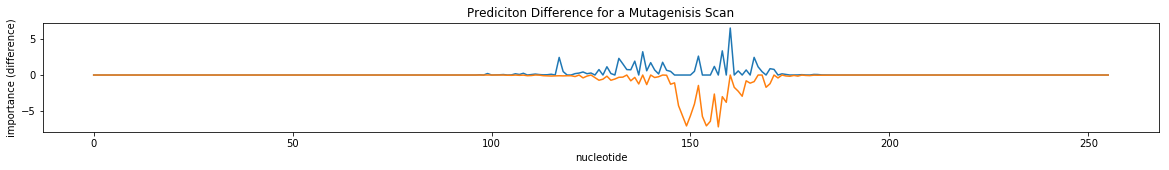

Masked average prediciton difference


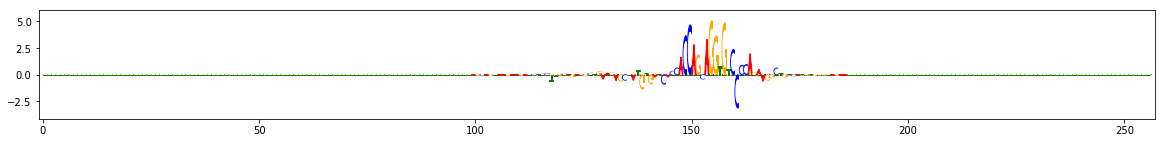

Information Content of Softmax prediction difference


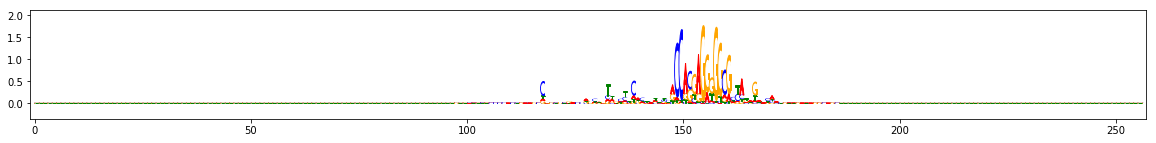

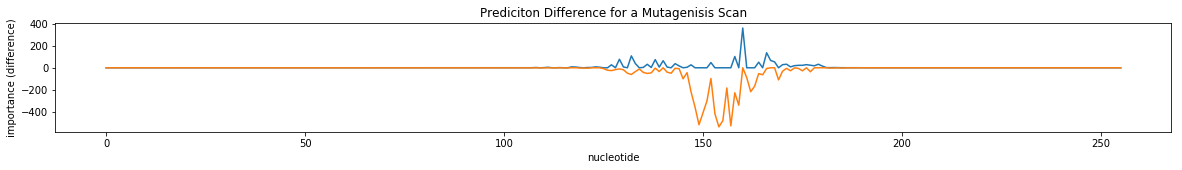

Masked average prediciton difference


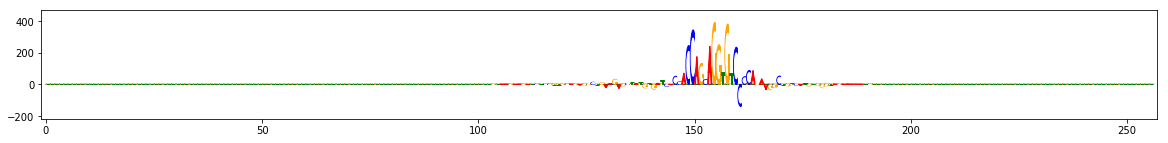

Information Content of Softmax prediction difference


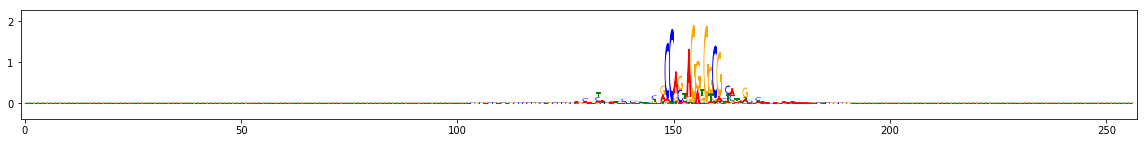

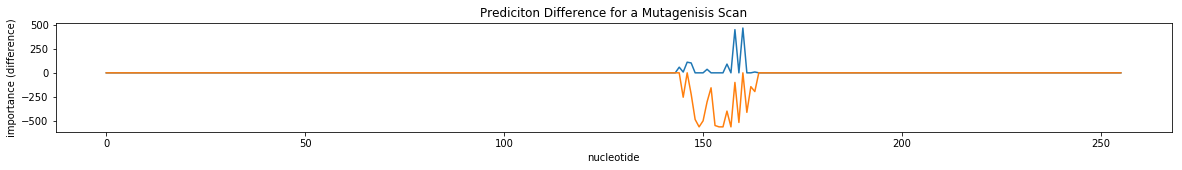

Masked average prediciton difference


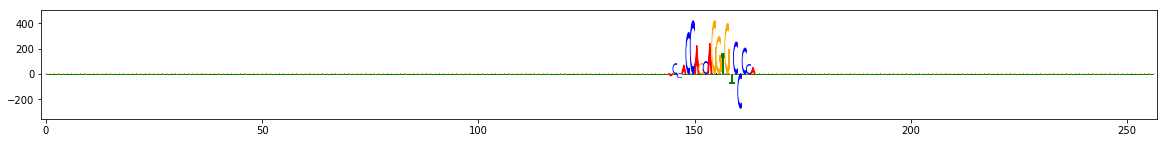

Information Content of Softmax prediction difference


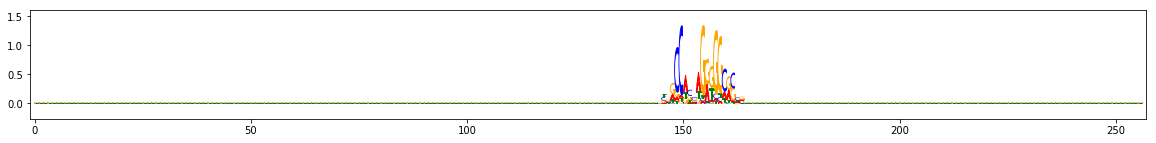

(array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32))

In [3]:
#print some stuff
seq.logo()
viz_sequence.plot_weights(seq.seq[90:160])
sigmodel.get_importance(seq, viz=True, plot=True, temp=.25)
importance = regmodel.get_importance(seq, viz=True, plot=True, temp=.15)
pwm.get_importance(seq, viz=True, plot=True, temp=.15)

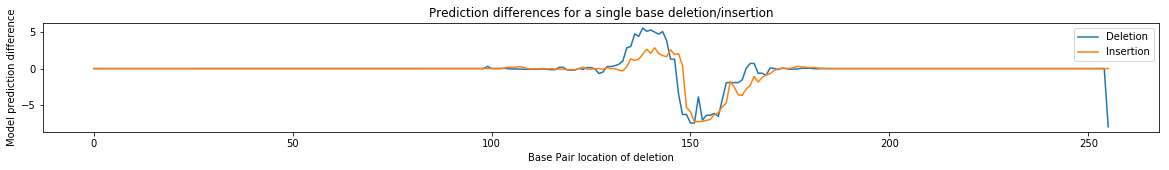

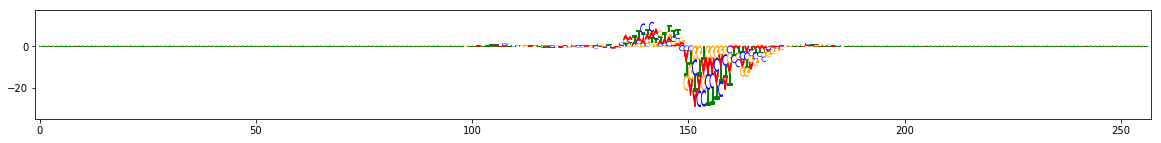

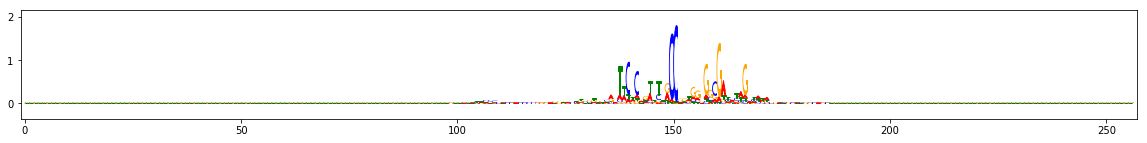

In [4]:
# look at deletion
deletes = sigmodel.get_activation(seq.deletion_mutant_gen()) - sigmodel.get_activation(seq)
additions = sigmodel.get_activation(seq.insertion_mutant_gen()) - sigmodel.get_activation(seq)
additions = additions.reshape(256,-1)

plt.figure(figsize=(20,2))
plt.plot(deletes)
plt.plot(np.average(additions, axis=1))
plt.title('Prediction differences for a single base deletion/insertion')
plt.ylabel('Model prediction difference')
plt.xlabel('Base Pair location of deletion')
plt.legend(['Deletion', 'Insertion'])
plt.show()

viz_sequence.plot_weights(additions)
viz_sequence.plot_icweights(helper.softmax(additions))


In [12]:
# double mutagenisis
doubles = sigmodel.get_activation(seq.double_mutant_gen()) - sigmodel.get_activation(seq)

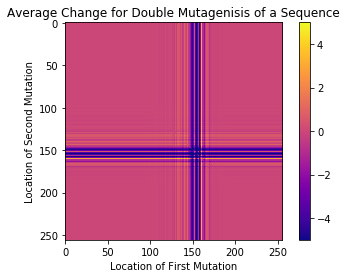

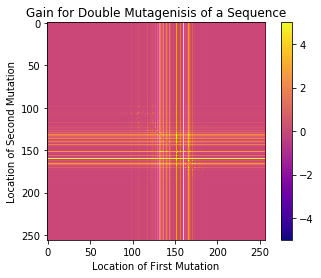

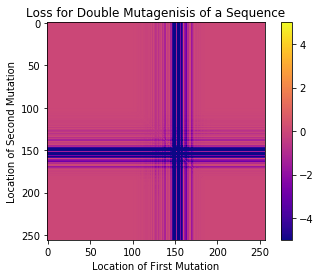

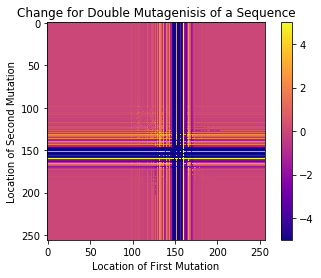

In [28]:
doubles = doubles.reshape(256,4, -1, 4)
maxes = np.amax(doubles, axis=(3, 1))
mins = np.amin(doubles, axis=(1, 3))
nets = np.where(abs(maxes)>= abs(mins), maxes, mins)

# plot the maximum difference 
im = plt.imshow(np.average(doubles, axis=(1,3)), cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Average Change for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()

# plot the maximum difference 
im = plt.imshow(maxes, cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Gain for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()

# plot the minimum difference 
im = plt.imshow(mins, cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Loss for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()


# plot the largest net difference 
im = plt.imshow(nets, cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Change for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()

(256, 4, 256, 4)


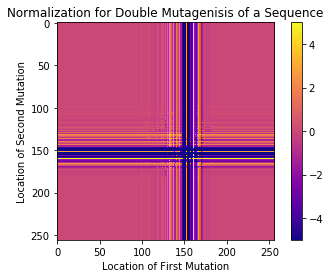

In [43]:
# normalize the change
norm1 = np.repeat(doubles.reshape(256, 4, -1)[:,:,0], (seq_len*4)).reshape((seq_len,4,seq_len,4))
norm2 = np.rot90(norm1, axes=(0,2))
normalizations = (norm1 + norm2)
maxes = np.amax(normalizations, axis=(3, 1))
mins = np.amin(normalizations, axis=(1, 3))
normnets = np.where(abs(maxes)>= abs(mins), maxes, mins)
print(normalizations.shape)

normdoubs = doubles - normalizations
nmaxs = np.amax(normdoubs, axis=(3, 1))
nmins = np.amin(normdoubs, axis=(1, 3))
nnets = np.where(abs(nmaxes)>= abs(nmins), nmaxes, nmins)

im = plt.imshow(normnets, cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Normalization for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()

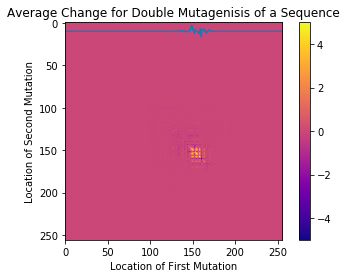

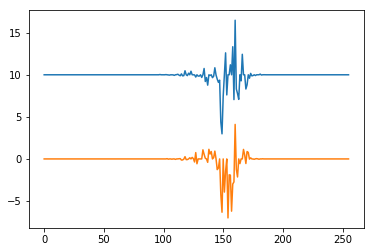

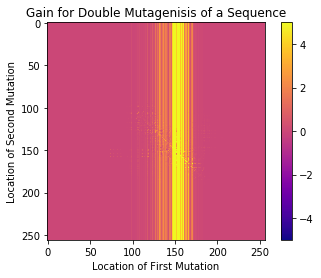

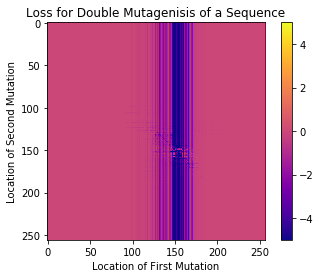

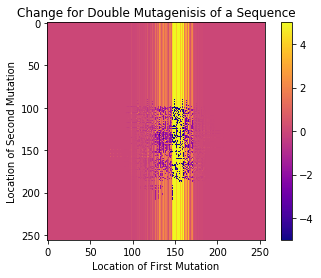

In [62]:
# plot the maximum difference 
im = plt.imshow(np.average(normdoubs, axis=(1,3)), cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Average Change for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()

plt.plot(doubles[0, 0, :, 2]+10)
plt.plot(normalizations[0, 0, :, 0])

#plt.plot(np.average(normdoubs, axis=(1,3))[0, :])
plt.show()

# plot the maximum difference 
im = plt.imshow(nmaxs, cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Gain for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()

# plot the minimum difference 
im = plt.imshow(nmins, cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Loss for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()


# plot the largest net difference 
im = plt.imshow(nnets, cmap='plasma', vmin=-5, vmax=5)
plt.colorbar(im)
plt.title('Change for Double Mutagenisis of a Sequence')
plt.ylabel('Location of Second Mutation')
plt.xlabel('Location of First Mutation')
plt.show()